# Problem Statement
Classifying the person as male or female based on following parameter :
1. long_hair - This columns contains 0's and 1's where 1 is "long hair" and 0 is "not long hair".
2. forehead_width_cm - This column is in CM's. This is the width of the forehead.
3. forehead_height_cm - This is the height of the forehead and it's in Cm's.
4. nose_wide - This column contains 0's and 1's where 1 is "wide nose" and 0 is "not wide nose".
5. nose_long - This column contains 0's and 1's where 1 is "Long nose" and 0 is "not long nose".
6. lips_thin - This column contains 0's and 1's where 1 represents the "thin lips" while 0 is "Not thin lips".
7. distance_nose_to_lip_long - This column contains 0's and 1's where 1 represents the "long distance between nose and lips" while 0 is "short distance between nose and lips".

8. gender(Output variable) - This is either "Male" or "Female".

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import all required Libraries

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve

In [3]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Import the Dataset

In [4]:
gender = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/gender classification/gender_classification_v7.csv')

In [5]:
gender.shape

(5001, 8)

In [6]:
gender.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [7]:
gender.tail()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female
5000,1,15.4,5.4,1,1,1,1,Male


In [8]:
gender.sample(6)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
197,1,11.9,5.9,0,0,1,0,Female
1426,0,12.0,5.2,0,1,0,0,Female
4602,0,11.8,6.6,1,1,1,0,Male
707,1,13.1,5.3,1,1,1,1,Male
3527,1,11.9,6.7,1,1,1,1,Male
356,0,11.6,6.2,0,0,0,0,Female


In [9]:
gender.describe(include = 'all')

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2501
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900,NaN
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049,NaN
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000,NaN
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000,NaN
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000,NaN
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000,NaN


In [10]:
gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


## EDA

In [11]:
g = gender.copy()     #made a copy because I don't want to make the following changes in original dataset

In [12]:
cat_var = ['long_hair', 'nose_wide', 'nose_long',	'lips_thin',	'distance_nose_to_lip_long']
num_var = ['forehead_width_cm', 'forehead_height_cm']

In [13]:
g[cat_var] = g[cat_var].astype('category')

In [14]:
g.dtypes

long_hair                    category
forehead_width_cm             float64
forehead_height_cm            float64
nose_wide                    category
nose_long                    category
lips_thin                    category
distance_nose_to_lip_long    category
gender                         object
dtype: object

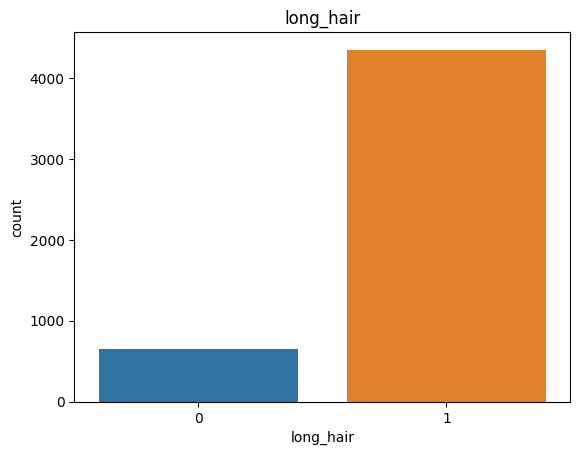

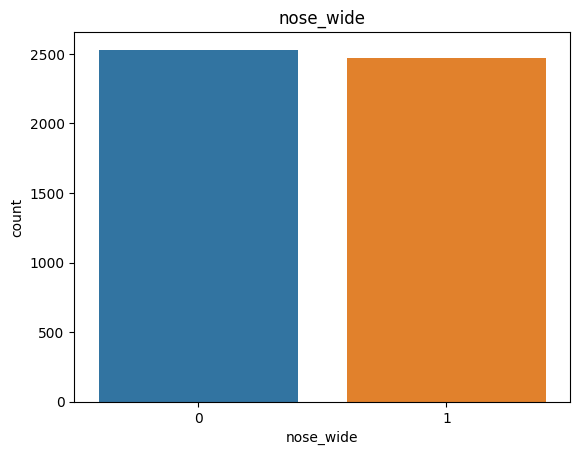

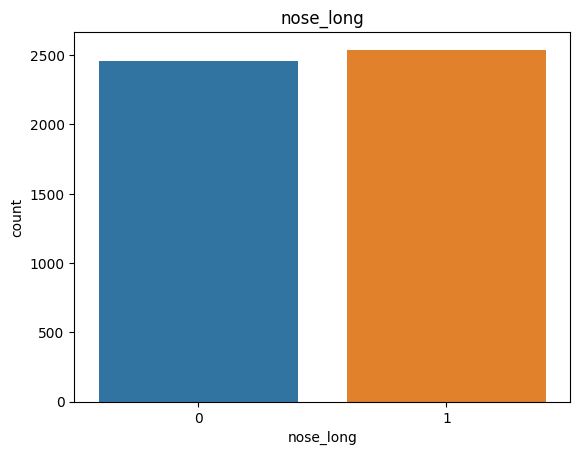

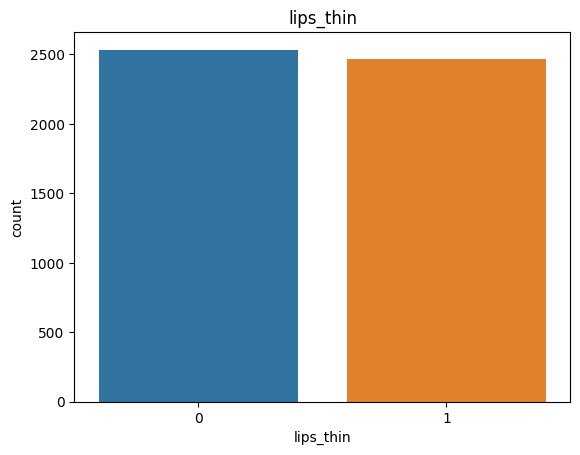

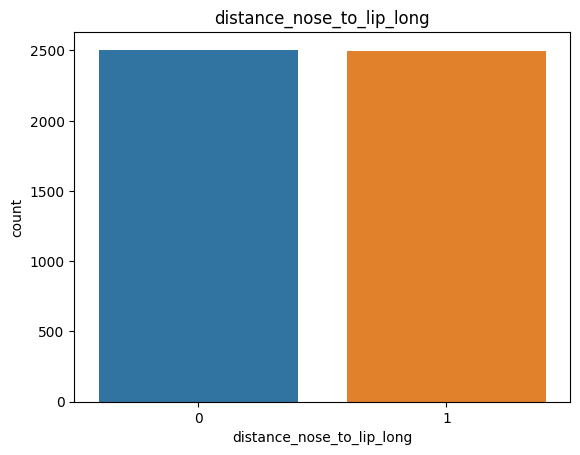

In [15]:
for i in cat_var:
  plt.title(i)
  sns.countplot(x=i, data = g)
  plt.show()

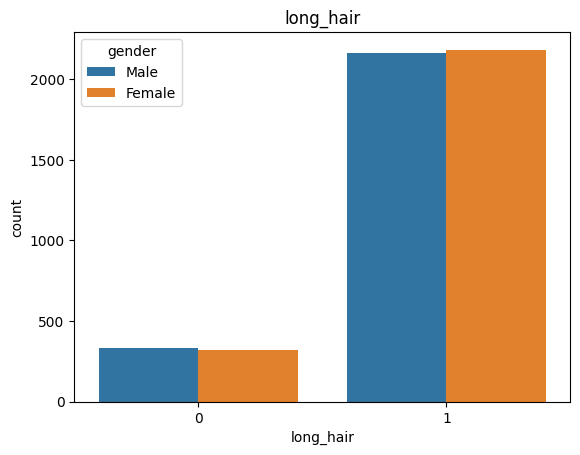

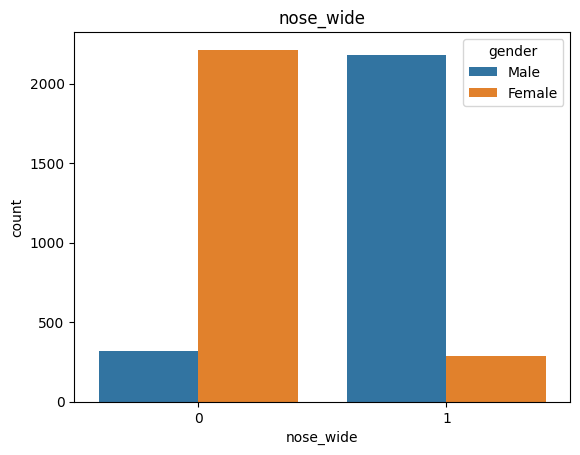

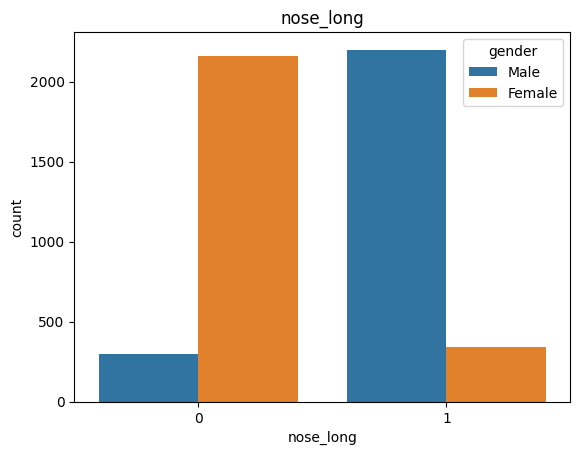

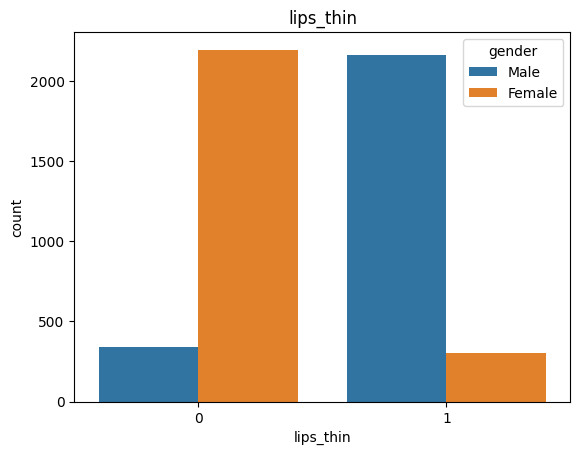

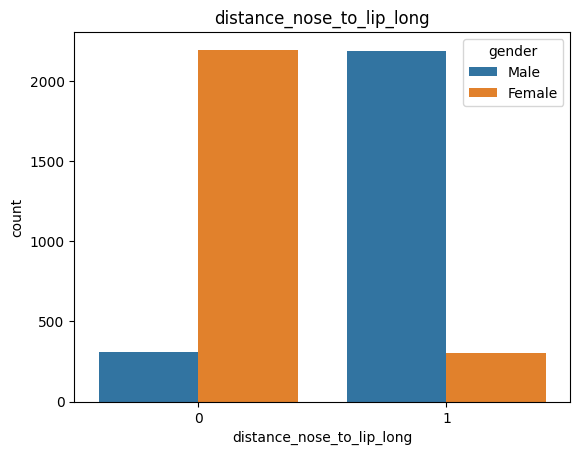

In [16]:
for i in cat_var:
  plt.title(i)
  sns.countplot(x=i, data = g, hue = g.gender)
  plt.show()

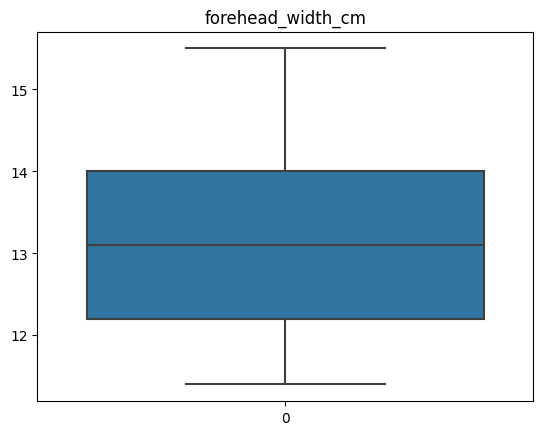

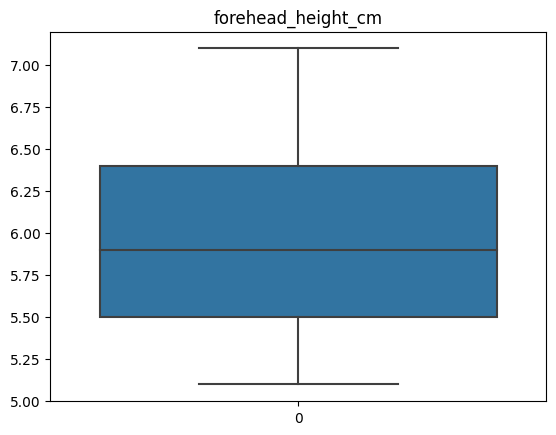

In [17]:
for j in num_var:
  plt.title(j)
  sns.boxplot(g[j])
  plt.show()

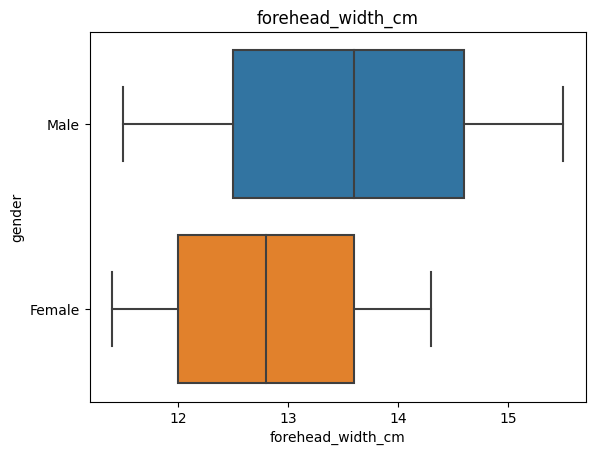

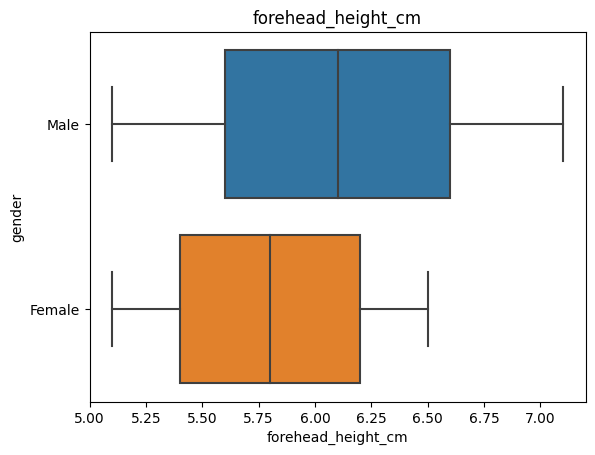

In [18]:
for j in num_var:
  plt.title(j)
  sns.boxplot(x = g[j], y = g.gender)
  plt.show()

### Output variable

<Axes: xlabel='gender', ylabel='count'>

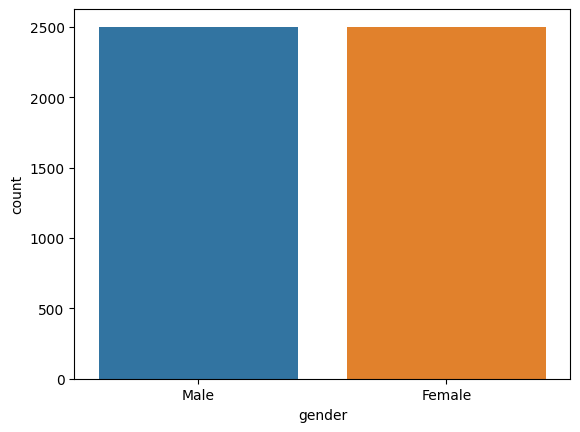

In [19]:
sns.countplot(x= 'gender', data = g)

In [20]:
g['gender'].value_counts()

Female    2501
Male      2500
Name: gender, dtype: int64

## Preprocessing

In [21]:
gender.isna().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [22]:
gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [23]:
gender['gender']=gender['gender'].map({'Female':0, 'Male':1})

In [24]:
gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 312.7 KB


In [25]:
gender.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0


## train-test split

In [26]:
X = gender.drop(['gender'], axis=1)
y =gender['gender']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 78, stratify= y)

In [28]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3500, 7)
(1501, 7)
(3500,)
(1501,)


In [29]:
print(X_train.head())
print(X_test.head())
print(y_train.head())
print(y_test.head())

      long_hair  forehead_width_cm  forehead_height_cm  nose_wide  nose_long  \
1332          1               12.1                 6.3          1          1   
3636          1               13.9                 6.5          0          0   
1295          1               14.9                 6.1          1          1   
361           1               13.8                 5.5          0          0   
2381          0               14.9                 5.3          1          1   

      lips_thin  distance_nose_to_lip_long  
1332          0                          0  
3636          0                          0  
1295          1                          1  
361           1                          1  
2381          1                          0  
      long_hair  forehead_width_cm  forehead_height_cm  nose_wide  nose_long  \
1383          1               14.1                 6.1          0          0   
875           1               13.1                 6.1          0          0   
4157     

## model Training

### evaluation matrix

In [30]:
def eval_metric(y_train, y_train_pred, y_test, y_test_pred):
  print("The train accuracy score is",accuracy_score(y_train,y_train_pred))
  print("The test accuracy score is",accuracy_score(y_test,y_test_pred))
  print(''' --------------------------------------------
                Train Report
-------------------------------------------- ''')
  print("The confusion matrix  is\n",confusion_matrix(y_train,y_train_pred))
  print("The classification report is\n",classification_report(y_train,y_train_pred))
  print(''' --------------------------------------------
                Test Report
-------------------------------------------- ''')
  print("The confusion matrix  is\n",confusion_matrix(y_test,y_test_pred))
  print("The classification report  is\n",classification_report(y_test,y_test_pred))

### Logistic regression

In [31]:
lr = LogisticRegression()

In [32]:
lr.fit(X_train, y_train)

lr_train_pred = lr.predict(X_train)
lr_test_pred = lr.predict(X_test)

eval_metric(y_train, lr_train_pred, y_test, lr_test_pred)

The train accuracy score is 0.9697142857142858
The test accuracy score is 0.9686875416389074
 --------------------------------------------
                Train Report
-------------------------------------------- 
The confusion matrix  is
 [[1698   52]
 [  54 1696]]
The classification report is
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      1750
           1       0.97      0.97      0.97      1750

    accuracy                           0.97      3500
   macro avg       0.97      0.97      0.97      3500
weighted avg       0.97      0.97      0.97      3500

 --------------------------------------------
                Test Report
-------------------------------------------- 
The confusion matrix  is
 [[731  20]
 [ 27 723]]
The classification report  is
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       751
           1       0.97      0.96      0.97       750

    accuracy

### SVM

In [33]:
svc = SVC()

svc_param_grid = {'C':[5,10], 'kernel':['linear', 'rbf'], 'gamma':[0.001, 0.005]}

In [34]:
svc_grid = GridSearchCV(estimator = svc, param_grid = svc_param_grid, cv = 5)
svc_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [5, 10], 'gamma': [0.001, 0.005],
                         'kernel': ['linear', 'rbf']})

In [35]:
svc_train_pred = svc_grid.predict(X_train)
svc_test_pred =svc_grid.predict(X_test)

eval_metric(y_train, svc_train_pred, y_test, svc_test_pred)

The train accuracy score is 0.9702857142857143
The test accuracy score is 0.9686875416389074
 --------------------------------------------
                Train Report
-------------------------------------------- 
The confusion matrix  is
 [[1702   48]
 [  56 1694]]
The classification report is
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      1750
           1       0.97      0.97      0.97      1750

    accuracy                           0.97      3500
   macro avg       0.97      0.97      0.97      3500
weighted avg       0.97      0.97      0.97      3500

 --------------------------------------------
                Test Report
-------------------------------------------- 
The confusion matrix  is
 [[731  20]
 [ 27 723]]
The classification report  is
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       751
           1       0.97      0.96      0.97       750

    accuracy

In [36]:
svc_grid.best_params_

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

### Desicion Tree

In [37]:
dt = DecisionTreeClassifier()

dt_param_grid = {'criterion':['gini', 'entropy'], 'max_depth':[5,6,8]}

In [38]:
dt_grid = GridSearchCV(estimator = dt, param_grid =dt_param_grid , cv =5 )
dt_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 8]})

In [39]:
dt_train_pred = dt_grid.predict(X_train)
dt_test_pred = dt_grid.predict(X_test)

eval_metric(y_train, dt_train_pred, y_test, dt_test_pred)

The train accuracy score is 0.9788571428571429
The test accuracy score is 0.966688874083944
 --------------------------------------------
                Train Report
-------------------------------------------- 
The confusion matrix  is
 [[1722   28]
 [  46 1704]]
The classification report is
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      1750
           1       0.98      0.97      0.98      1750

    accuracy                           0.98      3500
   macro avg       0.98      0.98      0.98      3500
weighted avg       0.98      0.98      0.98      3500

 --------------------------------------------
                Test Report
-------------------------------------------- 
The confusion matrix  is
 [[736  15]
 [ 35 715]]
The classification report  is
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       751
           1       0.98      0.95      0.97       750

    accuracy 

In [40]:
dt_grid.best_params_

{'criterion': 'gini', 'max_depth': 6}

### K Nearest Neigbour

In [41]:
kn = KNeighborsClassifier()

In [42]:
kn.fit(X_train, y_train)

kn_train_pred = kn.predict(X_train)
kn_test_pred = kn.predict(X_test)

eval_metric(y_train, kn_train_pred, y_test, kn_test_pred)

The train accuracy score is 0.9748571428571429
The test accuracy score is 0.9686875416389074
 --------------------------------------------
                Train Report
-------------------------------------------- 
The confusion matrix  is
 [[1717   33]
 [  55 1695]]
The classification report is
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      1750
           1       0.98      0.97      0.97      1750

    accuracy                           0.97      3500
   macro avg       0.97      0.97      0.97      3500
weighted avg       0.97      0.97      0.97      3500

 --------------------------------------------
                Test Report
-------------------------------------------- 
The confusion matrix  is
 [[737  14]
 [ 33 717]]
The classification report  is
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       751
           1       0.98      0.96      0.97       750

    accuracy

### Random Forest

In [43]:
rf = RandomForestClassifier()

rf_param_grid = {"n_estimators" : [50,100,150],"max_depth" : [5,8,10], "max_features" : [3, 5, 7], "min_samples_leaf" : [2 ,4, 6]}


In [75]:
rf_grid = GridSearchCV(estimator = rf, param_grid = rf_param_grid, cv =5 )
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 8, 10], 'max_features': [3, 5, 7],
                         'min_samples_leaf': [2, 4, 6],
                         'n_estimators': [50, 100, 150]})

In [76]:
rf_train_pred = rf_grid.predict(X_train)
rf_test_pred = rf_grid.predict(X_test)

eval_metric(y_train, rf_train_pred, y_test, rf_test_pred)

The train accuracy score is 0.9777142857142858
The test accuracy score is 0.9706862091938707
 --------------------------------------------
                Train Report
-------------------------------------------- 
The confusion matrix  is
 [[1724   26]
 [  52 1698]]
The classification report is
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1750
           1       0.98      0.97      0.98      1750

    accuracy                           0.98      3500
   macro avg       0.98      0.98      0.98      3500
weighted avg       0.98      0.98      0.98      3500

 --------------------------------------------
                Test Report
-------------------------------------------- 
The confusion matrix  is
 [[739  12]
 [ 32 718]]
The classification report  is
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       751
           1       0.98      0.96      0.97       750

    accuracy

In [77]:
rf_grid.best_params_

{'max_depth': 5, 'max_features': 3, 'min_samples_leaf': 2, 'n_estimators': 150}

### Gradient Boost

In [78]:
gb = GradientBoostingClassifier()
gb_param_grid = {'max_depth': [8,10,12,14], 'subsample': [0.8, 0.6], 'max_features':[0.2, 0.3],
              'n_estimators': [10, 20, 30]}

In [79]:
gb_grid = GridSearchCV(estimator = gb, param_grid = gb_param_grid, cv = 5)
gb_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [8, 10, 12, 14],
                         'max_features': [0.2, 0.3],
                         'n_estimators': [10, 20, 30],
                         'subsample': [0.8, 0.6]})

In [80]:
gb_train_pred = gb_grid.predict(X_train)
gb_test_pred = gb_grid.predict(X_test)

eval_metric(y_train, gb_train_pred, y_test, gb_test_pred)

The train accuracy score is 0.9868571428571429
The test accuracy score is 0.9700199866755497
 --------------------------------------------
                Train Report
-------------------------------------------- 
The confusion matrix  is
 [[1738   12]
 [  34 1716]]
The classification report is
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1750
           1       0.99      0.98      0.99      1750

    accuracy                           0.99      3500
   macro avg       0.99      0.99      0.99      3500
weighted avg       0.99      0.99      0.99      3500

 --------------------------------------------
                Test Report
-------------------------------------------- 
The confusion matrix  is
 [[736  15]
 [ 30 720]]
The classification report  is
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       751
           1       0.98      0.96      0.97       750

    accuracy

In [81]:
gb_grid.best_params_

{'max_depth': 8, 'max_features': 0.2, 'n_estimators': 10, 'subsample': 0.8}

## ANN

In [83]:
X_train_arr = X_train.values
X_test_arr = X_test.values

In [84]:
print(X_train_arr.shape)
print(X_test_arr.shape)

(3500, 7)
(1501, 7)


In [85]:
model = Sequential()
model.add(Dense(1, activation='sigmoid', input_shape=(7,)))

In [86]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [87]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 8         
                                                                 
Total params: 8 (32.00 Byte)
Trainable params: 8 (32.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [88]:
model_history = model.fit(X_train_arr, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
88/88 [==============================] - 1s 4ms/step - loss: 0.8830 - accuracy: 0.4675 - val_loss: 0.7068 - val_accuracy: 0.5200
Epoch 2/100
88/88 [==============================] - 0s 2ms/step - loss: 0.6541 - accuracy: 0.6254 - val_loss: 0.6067 - val_accuracy: 0.7057
Epoch 3/100
88/88 [==============================] - 0s 2ms/step - loss: 0.5637 - accuracy: 0.7743 - val_loss: 0.5627 - val_accuracy: 0.7129
Epoch 4/100
88/88 [==============================] - 0s 3ms/step - loss: 0.4937 - accuracy: 0.8539 - val_loss: 0.4756 - val_accuracy: 0.8614
Epoch 5/100
88/88 [==============================] - 0s 3ms/step - loss: 0.4420 - accuracy: 0.8907 - val_loss: 0.4235 - val_accuracy: 0.8929
Epoch 6/100
88/88 [==============================] - 0s 3ms/step - loss: 0.3981 - accuracy: 0.9046 - val_loss: 0.3992 - val_accuracy: 0.9000
Epoch 7/100
88/88 [==============================] - 0s 2ms/step - loss: 0.3644 - accuracy: 0.9186 - val_loss: 0.3586 - val_accuracy: 0.9071
Epoch 8/100
8

In [89]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


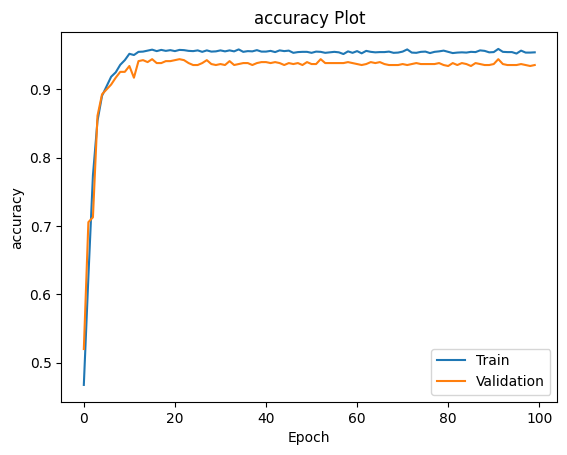

In [90]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('accuracy Plot')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

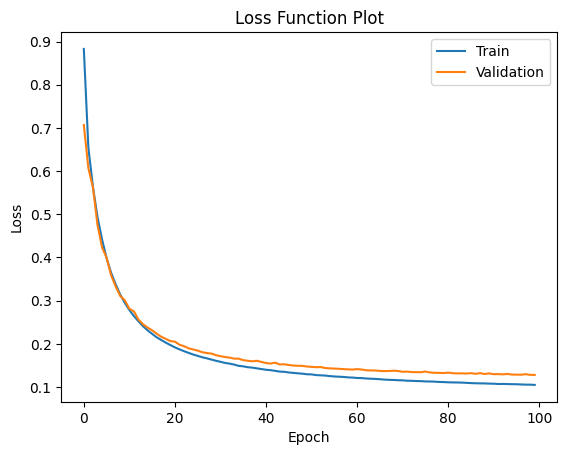

In [91]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Loss Function Plot')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [92]:
test_predicted_probabilities = model.predict(X_test_arr)
train_predicted_probabilities = model.predict(X_train_arr)

test_pred_class_labels = [0 if val<0.5 else 1 for val in test_predicted_probabilities]
train_pred_class_labels = [0 if val<0.5 else 1 for val in train_predicted_probabilities]

eval_metric(y_train, train_pred_class_labels, y_test, test_pred_class_labels)

110/110 [==============================] - 0s 2ms/step
The train accuracy score is 0.9517142857142857
The test accuracy score is 0.9506995336442372
 --------------------------------------------
                Train Report
-------------------------------------------- 
The confusion matrix  is
 [[1661   89]
 [  80 1670]]
The classification report is
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      1750
           1       0.95      0.95      0.95      1750

    accuracy                           0.95      3500
   macro avg       0.95      0.95      0.95      3500
weighted avg       0.95      0.95      0.95      3500

 --------------------------------------------
                Test Report
-------------------------------------------- 
The confusion matrix  is
 [[717  34]
 [ 40 710]]
The classification report  is
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       751
           1

## MLP with 2 layers

In [93]:
mlp_model1 = Sequential()

mlp_model1.add(Dense(15, activation='tanh', kernel_initializer='normal', input_shape=(7,)))
mlp_model1.add(Dense(1, activation='sigmoid', kernel_initializer='normal'))

In [94]:
mlp_model1.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [95]:
model1_history = mlp_model1.fit(X_train_arr, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
88/88 [==============================] - 1s 5ms/step - loss: 0.6876 - accuracy: 0.6279 - val_loss: 0.6834 - val_accuracy: 0.9271
Epoch 2/100
88/88 [==============================] - 0s 3ms/step - loss: 0.6782 - accuracy: 0.8196 - val_loss: 0.6719 - val_accuracy: 0.9400
Epoch 3/100
88/88 [==============================] - 0s 3ms/step - loss: 0.6631 - accuracy: 0.9171 - val_loss: 0.6512 - val_accuracy: 0.8271
Epoch 4/100
88/88 [==============================] - 0s 3ms/step - loss: 0.6385 - accuracy: 0.9293 - val_loss: 0.6210 - val_accuracy: 0.9471
Epoch 5/100
88/88 [==============================] - 0s 3ms/step - loss: 0.6002 - accuracy: 0.9461 - val_loss: 0.5745 - val_accuracy: 0.9471
Epoch 6/100
88/88 [==============================] - 0s 3ms/step - loss: 0.5446 - accuracy: 0.9539 - val_loss: 0.5103 - val_accuracy: 0.9400
Epoch 7/100
88/88 [==============================] - 0s 3ms/step - loss: 0.4755 - accuracy: 0.9507 - val_loss: 0.4418 - val_accuracy: 0.9543
Epoch 8/100
8

In [96]:
print(model1_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


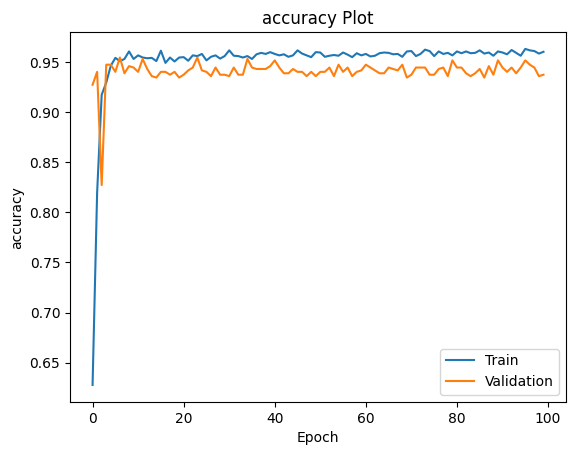

In [97]:
plt.plot(model1_history.history['accuracy'])
plt.plot(model1_history.history['val_accuracy'])
plt.title('accuracy Plot')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

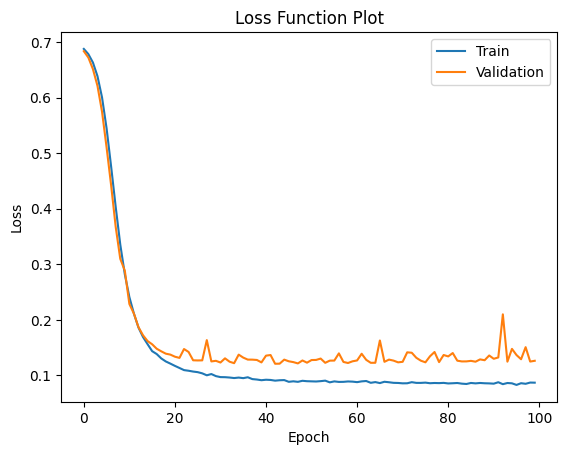

In [98]:
plt.plot(model1_history.history['loss'])
plt.plot(model1_history.history['val_loss'])
plt.title('Loss Function Plot')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [99]:
test_predicted_probabilities1 = mlp_model1.predict(X_test_arr)
train_predicted_probabilities1 = mlp_model1.predict(X_train_arr)

test_pred_class_labels1 = [0 if val<0.5 else 1 for val in test_predicted_probabilities1]
train_pred_class_labels1 = [0 if val<0.5 else 1 for val in train_predicted_probabilities1]

eval_metric(y_train, train_pred_class_labels, y_test, test_pred_class_labels)

110/110 [==============================] - 0s 2ms/step
The train accuracy score is 0.9517142857142857
The test accuracy score is 0.9506995336442372
 --------------------------------------------
                Train Report
-------------------------------------------- 
The confusion matrix  is
 [[1661   89]
 [  80 1670]]
The classification report is
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      1750
           1       0.95      0.95      0.95      1750

    accuracy                           0.95      3500
   macro avg       0.95      0.95      0.95      3500
weighted avg       0.95      0.95      0.95      3500

 --------------------------------------------
                Test Report
-------------------------------------------- 
The confusion matrix  is
 [[717  34]
 [ 40 710]]
The classification report  is
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       751
           1

## MLP with 3 layers

In [100]:
mlp_model3 = Sequential()

mlp_model3.add(Dense(25, input_shape=(7,), activation='relu', kernel_initializer='normal'))
mlp_model3.add(Dense(20, activation='relu', kernel_initializer='normal'))
mlp_model3.add(Dense(1, activation='sigmoid', kernel_initializer='normal'))

In [101]:
mlp_model3.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [102]:
model3_history = mlp_model3.fit(X_train_arr, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
88/88 [==============================] - 1s 5ms/step - loss: 0.6926 - accuracy: 0.6075 - val_loss: 0.6925 - val_accuracy: 0.4800
Epoch 2/100
88/88 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.5675 - val_loss: 0.6921 - val_accuracy: 0.6443
Epoch 3/100
88/88 [==============================] - 0s 3ms/step - loss: 0.6918 - accuracy: 0.6643 - val_loss: 0.6916 - val_accuracy: 0.7900
Epoch 4/100
88/88 [==============================] - 0s 3ms/step - loss: 0.6913 - accuracy: 0.6682 - val_loss: 0.6912 - val_accuracy: 0.7143
Epoch 5/100
88/88 [==============================] - 0s 3ms/step - loss: 0.6907 - accuracy: 0.7471 - val_loss: 0.6905 - val_accuracy: 0.9229
Epoch 6/100
88/88 [==============================] - 0s 3ms/step - loss: 0.6901 - accuracy: 0.9261 - val_loss: 0.6896 - val_accuracy: 0.9214
Epoch 7/100
88/88 [==============================] - 0s 3ms/step - loss: 0.6891 - accuracy: 0.8107 - val_loss: 0.6885 - val_accuracy: 0.8386
Epoch 8/100
8

In [103]:
print(model3_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


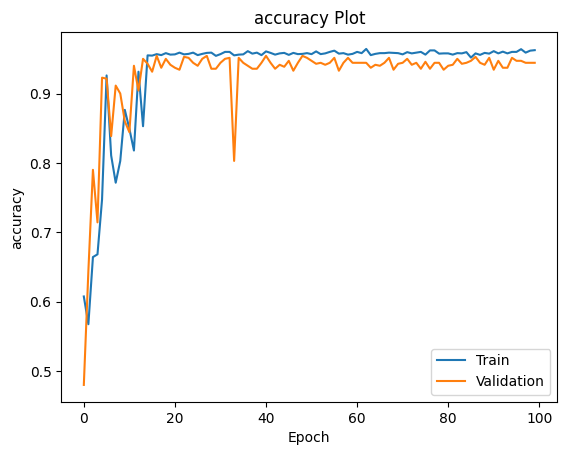

In [104]:
plt.plot(model3_history.history['accuracy'])
plt.plot(model3_history.history['val_accuracy'])
plt.title('accuracy Plot')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

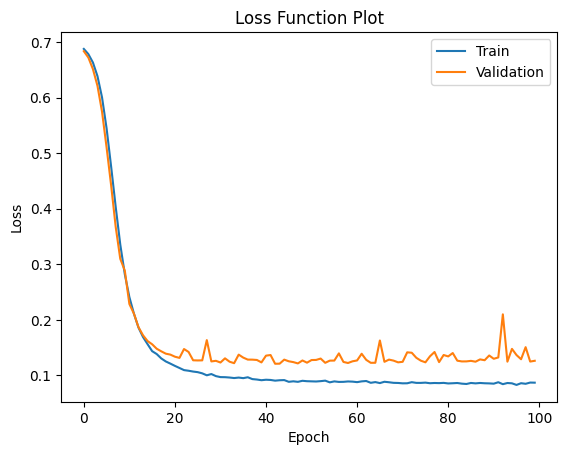

In [105]:
plt.plot(model1_history.history['loss'])
plt.plot(model1_history.history['val_loss'])
plt.title('Loss Function Plot')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [106]:
test_predicted_probabilities3 = mlp_model3.predict(X_test_arr)
train_predicted_probabilities3 = mlp_model3.predict(X_train_arr)

test_pred_class_labels3 = [0 if val<0.5 else 1 for val in test_predicted_probabilities3]
train_pred_class_labels3 = [0 if val<0.5 else 1 for val in train_predicted_probabilities3]

eval_metric(y_train, train_pred_class_labels, y_test, test_pred_class_labels)

110/110 [==============================] - 1s 6ms/step
The train accuracy score is 0.9517142857142857
The test accuracy score is 0.9506995336442372
 --------------------------------------------
                Train Report
-------------------------------------------- 
The confusion matrix  is
 [[1661   89]
 [  80 1670]]
The classification report is
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      1750
           1       0.95      0.95      0.95      1750

    accuracy                           0.95      3500
   macro avg       0.95      0.95      0.95      3500
weighted avg       0.95      0.95      0.95      3500

 --------------------------------------------
                Test Report
-------------------------------------------- 
The confusion matrix  is
 [[717  34]
 [ 40 710]]
The classification report  is
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       751
           1